## Detection of Adult Census Income with Machine Learning & Deep Learning
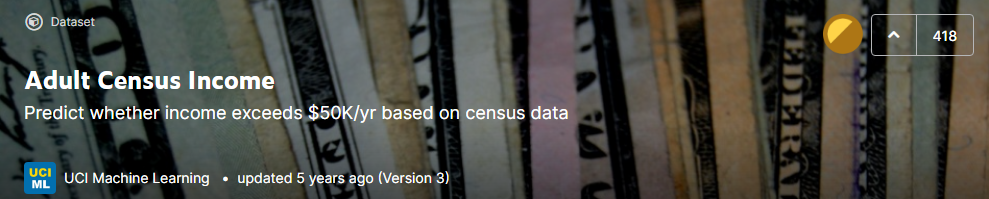
###### Dataset information:

- This data was extracted from the [1994 Census bureau database](https://www.census.gov/en.html) by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

The dataset can be found on the `` Kaggle`` platform at the link below:

https://www.kaggle.com/uciml/adult-census-income

## 1. Imports from libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense

## 2. Starting...

In [2]:
df = pd.read_csv("../input/adult-census-income/adult.csv")

In [3]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


We have 14 columns present in the dataset provided, 13 of which are characteristic variables (input data) and one of them is a target variable (which we want our model to be able to predict).

The characteristic variables are:

     age - The age of the user
     Workclass - User Profession
     final-weight - Final user income
     education - user education
     education-num - user education ID
     marital-status - user's civil status
     occupation - User occupation
     relationship - User relationship
     race - user race
     Fri - User Gender
     capital-gain - Capital gained
     capital-loss - lost capital
     hour-per-week - Hours per week
     native-country - hometown

The target variable is:

     income - a *binary* type that indicates the user's income:
             <=50k - User with income less than or equal to 50000
              >50k - User with income over 50000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Note that there are variables of type ``float64`` ("decimal" numbers), variables of type ``int64`` (integers) and variables of type ``object`` (in this case they are *strings*, or text) .

Since most supervised statistical learning algorithms only accept numerical values as input, it is necessary then to preprocess variables of type "object" before using this dataset as input for training a model.

The ``describe()`` function generates a lot of information about numeric variables that can also be useful:

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


###### Defining the features of our model
For this, we will create the variable X that will receive the characteristic variables of our model, and the variable y that will receive the target variable of our model.

We will also remove the 'clientid' columns that will not be relevant in our model.

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
# Definition of the columns that will be features (note that the column 'clientid' is not present)
features = [
    'age', 'workclass', 'fnlwgt', 'education', 'education.num',
    'marital.status', 'occupation', 'relationship', 'race', 'sex',
    'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'
]

# Preparation of arguments for ``scikit-learn`` library methods
X = df[features].values

###### Categorical variable handling

As mentioned before, computers aren't good with "categorical" variables (or strings).

Given a column with categorical variable, what we can do is encoding that column into multiple columns containing binary variables. This process is called "one-hot-encoding" or "dummy encoding".

In [8]:
from sklearn.preprocessing import LabelEncoder

lbp = LabelEncoder()

In [9]:
# Part of transforming categorical to integer

X[:, 1] = lbp.fit_transform(X[:, 1])

X[:, 3] = lbp.fit_transform(X[:, 3])

X[:, 5] = lbp.fit_transform(X[:, 5])

X[:, 6] = lbp.fit_transform(X[:, 6])

X[:, 7] = lbp.fit_transform(X[:, 7])
X
X[:, 8] = lbp.fit_transform(X[:, 8])

X[:, 9] = lbp.fit_transform(X[:, 9])

X[:, 13] = lbp.fit_transform(X[:, 13])

###### Checking if the data has changed from the first three lines

In [10]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


In [11]:
X[0:3]

array([[90, 0, 77053, 11, 9, 6, 0, 1, 4, 0, 0, 4356, 40, 39],
       [82, 4, 132870, 11, 9, 6, 4, 1, 4, 0, 0, 4356, 18, 39],
       [66, 0, 186061, 15, 10, 6, 0, 4, 2, 0, 0, 4356, 40, 39]],
      dtype=object)

In [12]:
# converting the Label to a numeric format for testing later...
LE = LabelEncoder()

y = LE.fit_transform(df["income"])

###### Scaling of numerical data
As we can see in the data there is a big difference between high numbers and low numbers, so we must scale the data to keep them on the same scale.

In [13]:
scaler = StandardScaler()

In [14]:
X = scaler.fit_transform(X)
X

array([[ 3.76961234, -2.65732045, -1.06799736, ..., 10.59350656,
        -0.03542945,  0.29156857],
       [ 3.18311167,  0.09005041, -0.53916866, ..., 10.59350656,
        -1.81720429,  0.29156857],
       [ 2.01011032, -2.65732045, -0.03521956, ..., 10.59350656,
        -0.03542945,  0.29156857],
       ...,
       [ 0.10398314,  0.09005041, -0.33543266, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857]])

## 3. Dividing into training and testing sets
Now we need to convert our data into training and testing sets. We will use 75% as our training data and test our model on the remaining 25% with Scikit-learn's train_test_split function.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## 4. Creation of models

###### 1. Naive Bayes
The Naive Bayes algorithm is a simple classification algorithm that uses historical data to predict the classification of new data. It works by calculating the probability of an event occurring given that another event has already occurred.

In [16]:
nb = GaussianNB()

In [17]:
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

In [18]:
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_nb = roc_auc_score(y_test, y_pred_nb)

In [19]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6193
           1       0.68      0.33      0.44      1948

    accuracy                           0.80      8141
   macro avg       0.75      0.64      0.66      8141
weighted avg       0.79      0.80      0.78      8141



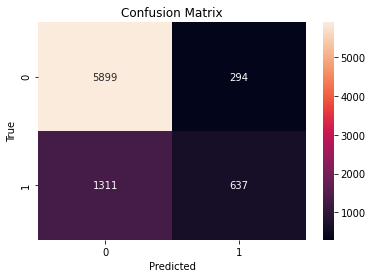

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 2. Decision Tree
The Decision Tree algorithm are statistical models that use supervised training for data classification and prediction. These models use the divide-and-conquer strategy: a complex problem is decomposed into simpler sub-problems and recursively this technique is applied to each sub. -problem

In [21]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [22]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_pred_dt)

In [24]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6193
           1       0.62      0.62      0.62      1948

    accuracy                           0.82      8141
   macro avg       0.75      0.75      0.75      8141
weighted avg       0.82      0.82      0.82      8141



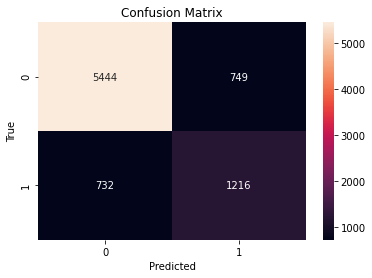

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 3. Random Forest
The Random Forest algorithm creates a forest in a random way, creating several decision trees and combining them, each tree tries to estimate a ranking and this is called as “vote”, thus to obtain a more accurate and more stable prediction.

In [26]:
rf = RandomForestClassifier(n_estimators = 40, criterion= 'entropy', random_state= 0)

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [28]:
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_pred_rf)

In [29]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6193
           1       0.74      0.60      0.66      1948

    accuracy                           0.85      8141
   macro avg       0.81      0.77      0.79      8141
weighted avg       0.85      0.85      0.85      8141



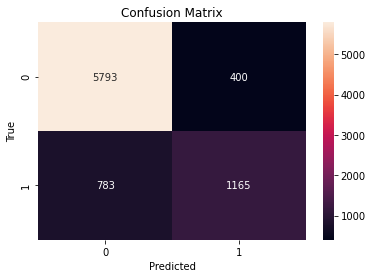

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 4. kNN
The KNN or k-nearest neighbor algorithm is a very simple machine learning algorithm. It uses some sort of similarity measure to tell which class the new data falls into, in which case we'll use 5 nearest neighbors.

In [31]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_knn = roc_auc_score(y_test, y_pred_knn)

In [34]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6193
           1       0.66      0.58      0.62      1948

    accuracy                           0.83      8141
   macro avg       0.77      0.74      0.75      8141
weighted avg       0.82      0.83      0.83      8141



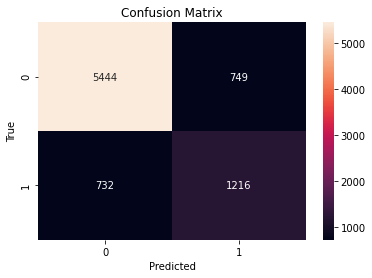

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 5. Logistic Regression
Logistic regression algorithm is used where a discrete output is expected, (eg Predict whether a user is a good or bad payer). Typically, logistic regression uses some function to squeeze values into a given range.

In [36]:
rl = LogisticRegression(random_state=0)

In [37]:
rl.fit(X_test, y_test)

LogisticRegression(random_state=0)

In [38]:
y_pred_rl = rl.predict(X_test)

accuracy_rl = accuracy_score(y_test, y_pred_rl)
recall_rl = recall_score(y_test, y_pred_rl)
precision_rl = precision_score(y_test, y_pred_rl)
f1_rl = f1_score(y_test, y_pred_rl)
roc_rl = roc_auc_score(y_test, y_pred_rl)

In [39]:
print(classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6193
           1       0.71      0.43      0.54      1948

    accuracy                           0.82      8141
   macro avg       0.78      0.69      0.71      8141
weighted avg       0.81      0.82      0.80      8141



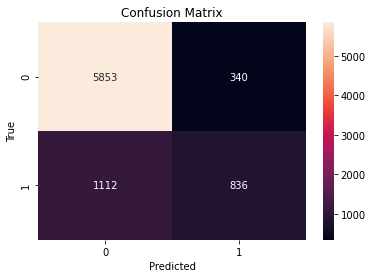

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred_rl),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 6. SVM (Support Vector Machines)
The SVM algorithm separates data points using a line. This line is chosen in such a way that it will be the most important of the closest data points in 2 categories.

In [41]:
svm = SVC(kernel = 'linear', random_state=0)

In [42]:
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [43]:
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_svm = roc_auc_score(y_test, y_pred_svm)

In [44]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6193
           1       0.80      0.31      0.45      1948

    accuracy                           0.82      8141
   macro avg       0.81      0.64      0.67      8141
weighted avg       0.81      0.82      0.78      8141



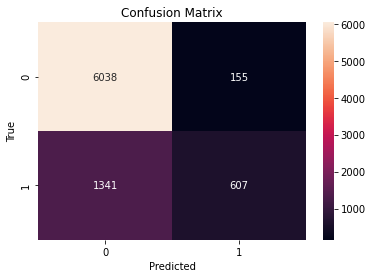

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 7. Neural networks
The purpose of the Neural Networks algorithm is to imitate the nervous system of humans in the learning process, it is inspired by biological neural networks

In [46]:
rn = MLPClassifier(verbose = True, max_iter= 250, tol = 0.000010)

In [47]:
rn.fit(X_train, y_train)

Iteration 1, loss = 0.46210977
Iteration 2, loss = 0.37065954
Iteration 3, loss = 0.34535645
Iteration 4, loss = 0.33195401
Iteration 5, loss = 0.32644756
Iteration 6, loss = 0.32403749
Iteration 7, loss = 0.32261974
Iteration 8, loss = 0.32131313
Iteration 9, loss = 0.32010027
Iteration 10, loss = 0.31974296
Iteration 11, loss = 0.31919899
Iteration 12, loss = 0.31825683
Iteration 13, loss = 0.31776861
Iteration 14, loss = 0.31757753
Iteration 15, loss = 0.31693749
Iteration 16, loss = 0.31654577
Iteration 17, loss = 0.31591206
Iteration 18, loss = 0.31553095
Iteration 19, loss = 0.31514186
Iteration 20, loss = 0.31473216
Iteration 21, loss = 0.31448576
Iteration 22, loss = 0.31398962
Iteration 23, loss = 0.31374372
Iteration 24, loss = 0.31317590
Iteration 25, loss = 0.31291278
Iteration 26, loss = 0.31268289
Iteration 27, loss = 0.31255479
Iteration 28, loss = 0.31194786
Iteration 29, loss = 0.31177648
Iteration 30, loss = 0.31189345
Iteration 31, loss = 0.31104945
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(max_iter=250, tol=1e-05, verbose=True)

In [48]:
y_pred_rn = rn.predict(X_test)

accuracy_rn = accuracy_score(y_test, y_pred_rn)
recall_rn = recall_score(y_test, y_pred_rn)
precision_rn = precision_score(y_test, y_pred_rn)
f1_rn = f1_score(y_test, y_pred_rn)
roc_rn = roc_auc_score(y_test, y_pred_rn)

In [49]:
print(classification_report(y_test, y_pred_rn))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6193
           1       0.72      0.59      0.65      1948

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.77      8141
weighted avg       0.84      0.85      0.84      8141



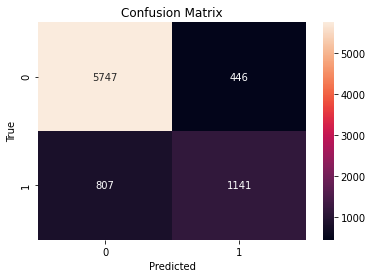

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred_rn),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

## 5. Viewing the results of all models

In [51]:
models = [('Naive Bayes', accuracy_nb, recall_nb, precision_nb, f1_nb, roc_nb),
          ('Decision Tree', accuracy_dt, recall_dt, precision_dt, f1_dt, roc_dt),
          ('Random Forest', accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf),
          ('kNN', accuracy_knn, recall_knn, precision_knn, f1_knn, roc_knn),
          ('Logistic Regression', accuracy_rl, recall_rl, precision_rl, f1_rl, roc_rl),
          ('SVM', accuracy_svm, recall_svm, precision_svm, f1_svm, roc_svm),
          ('Neural Networks', accuracy_rn, recall_rn, precision_rn, f1_rn, roc_rn)]

df_all_models = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC'])

df_all_models

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC
0,Naive Bayes,0.802850,0.327002,0.684211,0.442515,0.639765
1,Decision Tree,0.818081,0.624230,0.618830,0.621518,0.751643
2,Random Forest,0.854686,0.598049,0.744409,0.663251,0.766730
3,kNN,0.829014,0.583162,0.662005,0.620087,0.744754
4,Logistic Regression,0.821644,0.429158,0.710884,0.535211,0.687129
5,SVM,0.816239,0.311602,0.796588,0.447970,0.643287
6,Neural Networks,0.846088,0.585729,0.718967,0.645545,0.756856


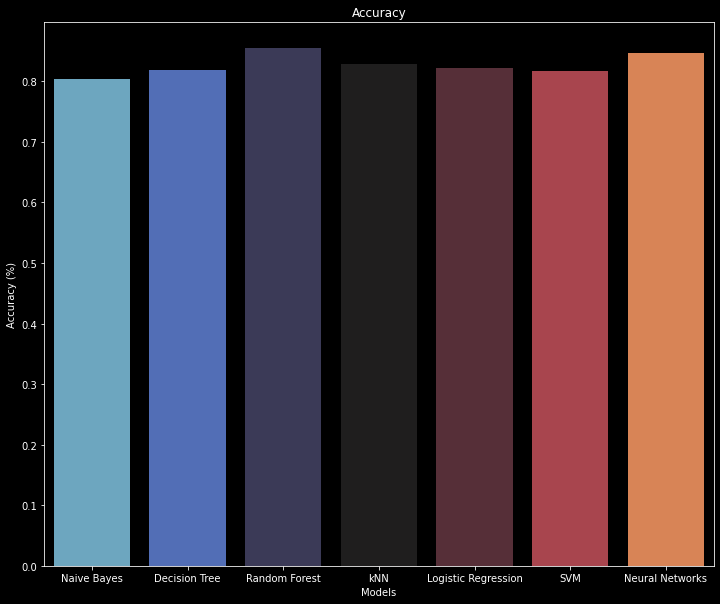

In [52]:
plt.style.use("dark_background")

plt.subplots(figsize=(12, 10))
sns.barplot(y = df_all_models['Accuracy (%)'], x = df_all_models['Model'], palette = 'icefire')
plt.xlabel("Models")
plt.title('Accuracy')
plt.show()

In [53]:
r_probs = [0 for _ in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
fpr_rl, tpr_rl, _ = roc_curve(y_test, y_pred_rl)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
fpr_rn, tpr_rn, _ = roc_curve(y_test, y_pred_rn)

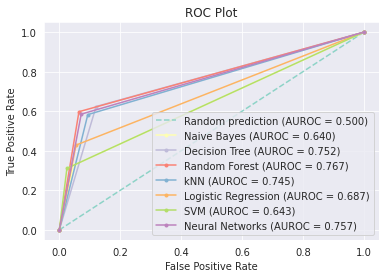

In [54]:
sns.set_style('darkgrid')

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

plt.plot(fpr_nb, tpr_nb, marker='.', label='Naive Bayes (AUROC = %0.3f)' % roc_nb)
plt.plot(fpr_dt, tpr_dt, marker='.', label='Decision Tree (AUROC = %0.3f)' % roc_dt)
plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest (AUROC = %0.3f)' % roc_rf)
plt.plot(fpr_knn, tpr_knn, marker='.', label='kNN (AUROC = %0.3f)' % roc_knn)
plt.plot(fpr_rl, tpr_rl, marker='.', label='Logistic Regression (AUROC = %0.3f)' % roc_rl)
plt.plot(fpr_svm, tpr_svm, marker='.', label='SVM (AUROC = %0.3f)' % roc_svm)
plt.plot(fpr_rn, tpr_rn, marker='.', label='Neural Networks (AUROC = %0.3f)' % roc_rn)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()